### DMO Project 

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

plt.style.use('seaborn')

%matplotlib inline

## Tasks 1 & 2

In [2]:
def edit_distance(x, y, D=1, I=1, S=1):
    n = len(x)
    m = len(y)
    
    rows = list(x) + ['end']
    columns = list(y) + ['end']
    
    matrix = pd.DataFrame(np.zeros((n+1,m+1), 
                          dtype = np.int),
                          columns = columns,
                          index = rows) 
    
    min_cost = matrix.copy()
    
    best = matrix.copy().astype(np.object)
    
    for i,a in enumerate(rows):
        for j,b in enumerate(columns):
            if a != b:
                matrix.iloc[i,j] = 1
    
    for i,a in enumerate(rows):
        min_cost.iloc[i][m] = (n - i) * D
        best.iloc[i][m] = (i+1,m, 'delete ' + a)
    
    for j,b in enumerate(columns):
        min_cost.iloc[n][j] = (m - j) * I
        best.iloc[n][j] = (n,j+1, 'insert ' + b)
    
    def solve(i, j):
        a = rows[i]
        b = columns[j]
        
        d_cost = D + min_cost.iloc[i+1,j]
        i_cost = I + min_cost.iloc[i,j+1]
        s_cost = S * matrix.iloc[i,j] + min_cost.iloc[i+1,j+1]
        
        c_min = min(d_cost, i_cost, s_cost)
        
        min_cost.iloc[i,j] = c_min
        
        if d_cost == c_min:
            best.iloc[i,j] = (i+1, j, 'delete ' + a)
        elif i_cost == c_min:
            best.iloc[i,j] = (i, j+1, 'insert ' + b)
        else:
            if matrix.iloc[i,j] == 0:
                best.iloc[i,j] = (i+1, j+1, 'match ' + b)
            else:
                best.iloc[i,j] = (i+1, j+1, 'substitute ' + a + ' for ' + b )

    for i in range(n-1, -1, -1):
        for j in range(m-1, -1, -1):
            solve(i,j)
            
    i, j = (0, 0)
    solution = []
    
    while i < n + 1 and j < m + 1:
        step = best.iloc[i,j]
        solution.append(step[2])
        i = step[0]
        j = step[1]
    
    return(solution, min_cost.iloc[0,0])        

In [3]:
def edit_distance_fast(x, y, D=1, I=1, S=1):
    n = len(x)
    m = len(y)
    
    rows = list(x) + ['end']
    columns = list(y) + ['end']
    
    matrix = np.zeros((n+1,m+1), dtype = int)
    
    min_cost = matrix.copy()
    
    best = matrix.copy().astype(np.object)
    
    for i,a in enumerate(rows):
        for j,b in enumerate(columns):
            if a != b:
                matrix[i,j] = 1
    
    for i,a in enumerate(rows):
        min_cost[i,m] = (n - i) * D
        best[i,m] = (i+1,m, 'delete ' + a)
    
    for j,b in enumerate(columns):
        min_cost[n,j] = (m - j) * I
        best[n,j] = (n,j+1, 'insert ' + b)
    
    def solve(i, j):
        a = rows[i]
        b = columns[j]
        
        d_cost = D + min_cost[i+1,j]
        i_cost = I + min_cost[i,j+1]
        s_cost = S * matrix[i,j] + min_cost[i+1,j+1]
        
        c_min = min(d_cost, i_cost, s_cost)
        
        min_cost[i,j] = c_min
        
        if d_cost == c_min:
            best[i,j] = (i+1, j, 'delete ' + a)
        elif i_cost == c_min:
            best[i,j] = (i, j+1, 'insert ' + b)
        else:
            if matrix[i,j] == 0:
                best[i,j] = (i+1, j+1, 'match ' + b)
            else:
                best[i,j] = (i+1, j+1, 'substitute ' + a + ' for ' + b )

    for i in range(n-1, -1, -1):
        for j in range(m-1, -1, -1):
            solve(i,j)
            
    i, j = (0, 0)
    solution = []
    
    while i < n + 1 and j < m + 1:
        step = best[i,j]
        solution.append(step[2])
        i = step[0]
        j = step[1]
    
    return(solution, min_cost[0,0], min_cost, best, matrix)        

In [4]:
x = 'ACTACTAGATTACTTACGGATCAGGTACTTTAGAGGCTTGCAACCA'
y = 'TACTAGCTTACTTACCCATCAGGTTTTAGAGATGGCAACCA'

print(edit_distance_fast(x,y), '\n\n')

print(edit_distance_fast(x,y, 2, 2, 1))

(['delete A', 'delete C', 'match T', 'match A', 'match C', 'match T', 'match A', 'match G', 'substitute A for C', 'match T', 'match T', 'match A', 'match C', 'match T', 'match T', 'match A', 'match C', 'substitute G for C', 'substitute G for C', 'match A', 'match T', 'match C', 'match A', 'match G', 'match G', 'match T', 'delete A', 'delete C', 'match T', 'match T', 'match T', 'match A', 'match G', 'match A', 'delete G', 'match G', 'substitute C for A', 'match T', 'substitute T for G', 'match G', 'match C', 'match A', 'match A', 'match C', 'match C', 'match A', 'insert end'], 10, array([[10, 11, 12, ..., 44, 45, 46],
       [ 9, 10, 11, ..., 43, 44, 45],
       [ 8,  9, 10, ..., 42, 43, 44],
       ..., 
       [39, 38, 37, ...,  0,  1,  2],
       [40, 39, 38, ...,  1,  0,  1],
       [41, 40, 39, ...,  2,  1,  0]]), array([[(1, 0, 'delete A'), (1, 1, 'delete A'), (1, 2, 'delete A'), ...,
        (1, 39, 'delete A'), (1, 40, 'delete A'), (1, 41, 'delete A')],
       [(2, 0, 'delete C'

## Task 3

In [35]:
x = 'ACTACTAGATTACTTACGGATCAGGTACTTTAGAGGCTTGCAACCA'
y = 'TACTAGCTTACTTACCCATCAGGTTTTAGAGATGGCAACCA'

solution, total_min_cost, min_cost, best, matrix = edit_distance_fast(x, y)

print('Minimum Edit Distance: ', total_min_cost)
print('Path: ', ', '.join(solution))

solution, total_min_cost, min_cost, best, matrix = edit_distance_fast(x, y, 2, 2, 1)

print('Minimum Edit Distance: ', total_min_cost)
print('Path: ', ', '.join(solution))


Minimum Edit Distance:  10
Path:  delete A, delete C, match T, match A, match C, match T, match A, match G, substitute A for C, match T, match T, match A, match C, match T, match T, match A, match C, substitute G for C, substitute G for C, match A, match T, match C, match A, match G, match G, match T, delete A, delete C, match T, match T, match T, match A, match G, match A, delete G, match G, substitute C for A, match T, substitute T for G, match G, match C, match A, match A, match C, match C, match A, insert end
Minimum Edit Distance:  15
Path:  delete A, delete C, match T, match A, match C, match T, match A, match G, substitute A for C, match T, match T, match A, match C, match T, match T, match A, match C, substitute G for C, substitute G for C, match A, match T, match C, match A, match G, match G, match T, delete A, delete C, match T, match T, match T, match A, match G, match A, delete G, match G, substitute C for A, match T, substitute T for G, match G, match C, match A, match A, 

In [36]:
x = 'AASRPRSGVPAQSDSDPCQNLAATPIPSRPPSSQSCQKCRADARQGRWGP'
y = 'SGAPGQRGEPGPQGHAGAPGPPGPPGSDG'

solution, total_min_cost, min_cost, best, matrix = edit_distance_fast(x, y)

print('Minimum Edit Distance: ', total_min_cost)
print('Path: ', ', '.join(solution))

solution, total_min_cost, min_cost, best, matrix = edit_distance_fast(x, y, 2, 2, 1)

print('Minimum Edit Distance: ', total_min_cost)
print('Path: ', ', '.join(solution))


Minimum Edit Distance:  37
Path:  delete A, delete A, delete S, delete R, delete P, delete R, match S, match G, substitute V for A, match P, substitute A for G, match Q, delete S, substitute D for R, substitute S for G, substitute D for E, match P, insert G, substitute C for P, match Q, substitute N for G, substitute L for H, match A, insert G, match A, delete T, match P, substitute I for G, match P, substitute S for P, substitute R for G, match P, match P, delete S, delete S, substitute Q for G, match S, delete C, delete Q, delete K, delete C, delete R, delete A, match D, delete A, delete R, delete Q, delete G, delete R, delete W, match G, delete P, insert end
Minimum Edit Distance:  58
Path:  delete A, delete A, delete S, delete R, delete P, delete R, match S, match G, substitute V for A, match P, substitute A for G, match Q, substitute S for R, substitute D for G, substitute S for E, substitute D for P, substitute P for G, substitute C for P, match Q, substitute N for G, substitute 

## Task 4

In [6]:
letters = ['A', 'B', 'C', 'D']
weights = [0.25, 0.25, 0.25, 0.25]

def define_pairs(N):
    words = [''.join(random.choices(letters, weights = weights, k = 50)) for _ in range(N*2)]
    pairs = [words[i:i+2] for i in range(0, N*2, 2)]
    return pairs

pairs_100 = define_pairs(100)
pairs_500 = define_pairs(500)
pairs_1000 = define_pairs(1000)

In [28]:
%time dist_100 = [edit_distance(pair[0], pair[1])[1] for pair in define_pairs(100)]

CPU times: user 6min 32s, sys: 3.69 s, total: 6min 35s
Wall time: 6min 35s


In [23]:
dist = {}

In [24]:
%time dist[100] = [edit_distance_fast(pair[0], pair[1])[1] for pair in define_pairs(100)]

CPU times: user 1.13 s, sys: 5.19 ms, total: 1.14 s
Wall time: 1.14 s


In [25]:
%time dist[500] = [edit_distance_fast(pair[0], pair[1])[1] for pair in define_pairs(500)]

CPU times: user 5.45 s, sys: 14.2 ms, total: 5.46 s
Wall time: 5.47 s


In [26]:
%time dist[1000] = [edit_distance_fast(pair[0], pair[1])[1] for pair in define_pairs(1000)]

CPU times: user 11.8 s, sys: 92.4 ms, total: 11.9 s
Wall time: 12 s


In [31]:
bins = range(22, 36)

def plot_hist(N):
    plt.hist(dist[N], bins = bins, density = True);
    plt.title('N = ' + str(N))
    print(str(N))
    print('Sample Mean: {:0.2f}'.format(np.mean(dist[N])))
    print('Sample Variance: {:0.2f}'.format(np.var(dist[N])))

    plt.savefig('Edit_Distance_Histogram_' + str(N) + '.jpg')
    plt.close()

for n in [100, 500, 1000]: plot_hist(n)

100
Sample Mean: 28.68
Sample Variance: 4.18
500
Sample Mean: 28.87
Sample Variance: 4.25
1000
Sample Mean: 28.80
Sample Variance: 4.68


Sample Mean: 28.78
Sample Variance: 4.62


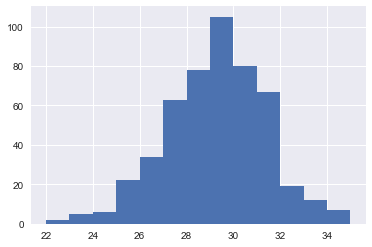

In [15]:
plt.hist(dist_500, bins = bins);

print('Sample Mean: {:0.2f}'.format(np.mean(dist_500)))
print('Sample Variance: {:0.2f}'.format(np.var(dist_500)))

plt.savefig('Edit Distance Histogram - 500.pg')

Sample Mean: 28.82
Sample Variance: 4.82


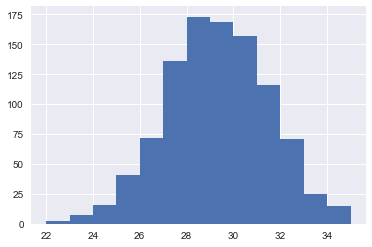

In [16]:
plt.hist(dist_1000, bins = bins);

print('Sample Mean: {:0.2f}'.format(np.mean(dist_1000)))
print('Sample Variance: {:0.2f}'.format(np.var(dist_1000)))

plt.savefig('Edit Distance Histogram - 1000.png')

In [7]:
edit_distance_fast('', '')

(['insert end'],
 0,
 array([[0]]),
 array([[(0, 1, 'insert end')]], dtype=object),
 array([[0]]))

In [11]:
solution, total_min_cost, min_cost, best, matrix = edit_distance_fast('AB', 'BA')

print(best)

[[(1, 0, 'delete A') (1, 2, 'match A') (1, 2, 'delete A')]
 [(2, 1, 'match B') (2, 2, 'substitute B for A') (2, 2, 'delete B')]
 [(2, 1, 'insert B') (2, 2, 'insert A') (2, 3, 'insert end')]]


In [43]:
solution, total_min_cost, min_cost, best, matrix = edit_distance_fast('ABBCAC', 'ABCA')

print(solution)

['match A', 'delete B', 'match B', 'match C', 'match A', 'delete C', 'insert end']
